# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
#OBSERVED TRENDS: For this exercise we plotted different scatterplots and regression lines to gain more information about a
# vacation destination. The most noticable trend based on location was temperature. Based on your latitude, it was easy to 
# predict what the temperature would be to a reasonable degree of accuracy. Cloudiness was also relatively predictable. 
# As you get closer to the equator, the cloudiness increases somewhat. For the other metrics such as wind speed, there was 
# little to no change based on latitude.

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from scipy.stats import linregress
from requests import get
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [72]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

653

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

#complete_url = url + "appid=" + weather_api_key + "&q=" + city

record = 0
set_record = 1
city_name=[]
lat=[]
long=[]
temp=[] 
humidity=[]
cloud=[]
wind=[]
country=[]
date=[]


#weather = get(complete_url).json()

print("Beginning Data Retrieval")
print("-----------------------------------------")
for city in cities:
    try:
        complete_url = url + "appid=" + weather_api_key + "&q=" + city
        weather = get(complete_url).json()
        city_name.append(weather['name'])
        lat.append(weather['coord']['lat'])
        long.append(weather['coord']['lon'])
        temp.append(weather['main']['temp_max'])
        humidity.append(weather['main']['humidity'])
        cloud.append(weather['clouds']['all'])
        wind.append(weather['wind']['speed'])
        country.append(weather['sys']['country'])
        date.append(weather['dt'])
        if record <= 50:
            record += 1
            
        else:
            record = 1
            set_record += 1
        print("Processing Record "+str(record)+" of Set "+str(set_record)+ " | " +city)
    except KeyError:
        print('City not found. Skipping...')
    continue

print("---------------------------------------------------")
print("Data retrieval complete")

Beginning Data Retrieval
-----------------------------------------
Processing Record 1 of Set 1 | itanagar
Processing Record 2 of Set 1 | alexander city
Processing Record 3 of Set 1 | upernavik
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | srisailam
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | naron
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | bethel
City not found. Skipping...
Processing Record 10 of Set 1 | matagami
Processing Record 11 of Set 1 | kavieng
City not found. Skipping...
Processing Record 12 of Set 1 | tautira
Processing Record 13 of Set 1 | cockburn town
City not found. Skipping...
Processing Record 14 of Set 1 | cap malheureux
Processing Record 15 of Set 1 | jarabacoa
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | la asuncion
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | coahuayana
City not found. S

Processing Record 36 of Set 4 | san luis
Processing Record 37 of Set 4 | bundaberg
Processing Record 38 of Set 4 | constitucion
Processing Record 39 of Set 4 | palu
Processing Record 40 of Set 4 | matamoros
City not found. Skipping...
Processing Record 41 of Set 4 | bata
Processing Record 42 of Set 4 | kashary
Processing Record 43 of Set 4 | narsaq
Processing Record 44 of Set 4 | esperance
Processing Record 45 of Set 4 | konevo
Processing Record 46 of Set 4 | terrace
Processing Record 47 of Set 4 | varzea paulista
Processing Record 48 of Set 4 | oranjemund
Processing Record 49 of Set 4 | ayan
Processing Record 50 of Set 4 | sibu
Processing Record 51 of Set 4 | puerto quijarro
Processing Record 1 of Set 5 | sao joao da barra
Processing Record 2 of Set 5 | husavik
Processing Record 3 of Set 5 | ponta do sol
Processing Record 4 of Set 5 | pravia
Processing Record 5 of Set 5 | akyab
Processing Record 6 of Set 5 | omboue
Processing Record 7 of Set 5 | dongsheng
Processing Record 8 of Set 5 

Processing Record 23 of Set 8 | baruun-urt
Processing Record 24 of Set 8 | itarema
Processing Record 25 of Set 8 | rudbar
Processing Record 26 of Set 8 | ostrovnoy
City not found. Skipping...
Processing Record 27 of Set 8 | eureka
Processing Record 28 of Set 8 | murgab
Processing Record 29 of Set 8 | tezu
Processing Record 30 of Set 8 | mutis
Processing Record 31 of Set 8 | kaeo
Processing Record 32 of Set 8 | novoukrainskiy
City not found. Skipping...
Processing Record 33 of Set 8 | dickinson
Processing Record 34 of Set 8 | kurilsk
Processing Record 35 of Set 8 | leningradskiy
City not found. Skipping...
Processing Record 36 of Set 8 | mocuba
Processing Record 37 of Set 8 | mosalsk
City not found. Skipping...
Processing Record 38 of Set 8 | ibra
Processing Record 39 of Set 8 | gizo
Processing Record 40 of Set 8 | college
Processing Record 41 of Set 8 | marsa matruh
Processing Record 42 of Set 8 | qaqortoq
Processing Record 43 of Set 8 | porto novo
Processing Record 44 of Set 8 | lagoa

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
city_weather_dict = {"City" : city_name, 
                     "Lat" : lat, 
                     "Lng" : long,
                     "Max Temp" : temp,
                     "Humidity" : humidity,
                     "Cloudiness" : cloud,
                     "Wind Speed" : wind,
                     "Country" : country,
                     "Date" : date,
                    }
city_weather_df = pd.DataFrame(city_weather_dict)
city_weather_df.head()
city_weather_csv = city_weather_df.to_csv("../output_data/city_weather_df.csv")

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [45]:
df_2 = city_weather_df
df_2.drop(["City","Country"], axis=1)

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,27.1000,93.6167,295.09,98,52,1.24,1622566527
1,32.9440,-85.9539,302.01,61,1,2.57,1622566420
2,72.7868,-56.1549,272.86,85,54,1.53,1622566528
3,-33.5906,26.8910,290.13,82,100,5.87,1622566451
4,16.0833,78.8667,304.39,46,89,0.66,1622566528
...,...,...,...,...,...,...,...
535,40.6576,-73.5832,299.42,54,100,1.79,1622566638
536,43.3236,145.5750,279.47,88,79,3.79,1622566679
537,27.0837,-80.4164,304.25,68,36,6.08,1622566679
538,8.8333,3.7500,303.01,58,84,4.65,1622566679


In [58]:
summary_df = df_2[["Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Date"]].describe()
summary_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,5.400000e+02
mean,17.231264,15.329941,293.573574,67.427778,62.301852,3.470278,1.622567e+09
std,33.512213,91.460200,9.094885,22.212341,35.966017,2.309228,8.130429e+01
min,-54.800000,-175.200000,270.280000,4.000000,0.000000,0.000000,1.622566e+09
25%,-10.238625,-68.149175,286.882500,55.000000,27.750000,1.700000,1.622567e+09
50%,18.852550,18.569250,295.140000,72.000000,75.000000,2.920000,1.622567e+09
75%,44.788950,96.138050,299.877500,84.000000,95.000000,4.845000,1.622567e+09
max,78.218600,179.316700,316.350000,100.000000,100.000000,11.910000,1.622567e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

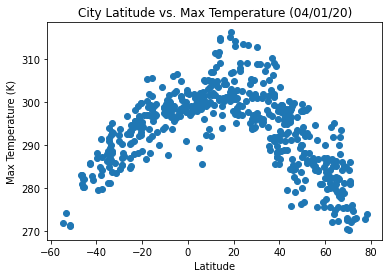

In [59]:
temp_plot = plt.scatter(df_2["Lat"], df_2["Max Temp"])
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
temp_plot
figure_1 = plt.savefig('../output_data/Figure1.png')

## Latitude vs. Humidity Plot

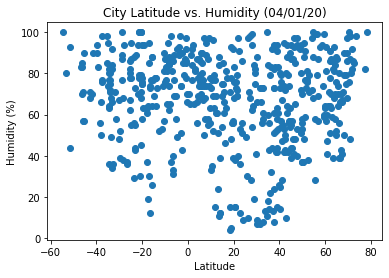

In [60]:
humidity_plot = plt.scatter(df_2["Lat"], df_2["Humidity"])
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
humidity_plot
figure_2 = plt.savefig('../output_data/Figure2.png')

## Latitude vs. Cloudiness Plot

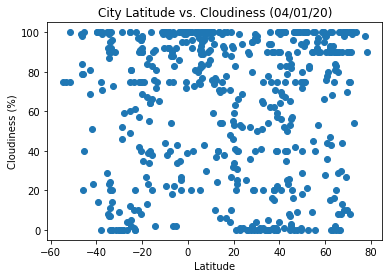

In [61]:
cloud_plot = plt.scatter(df_2["Lat"], df_2["Cloudiness"])
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
cloud_plot
figure_3 = plt.savefig('../output_data/Figure3.png')

## Latitude vs. Wind Speed Plot

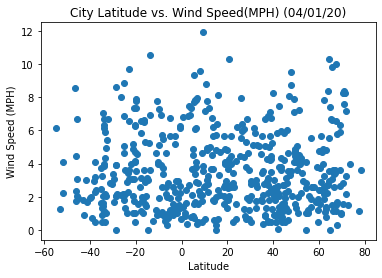

In [62]:
wind_plot = plt.scatter(df_2["Lat"], df_2["Wind Speed"])
plt.title("City Latitude vs. Wind Speed(MPH) (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
wind_plot
figure_4 = plt.savefig('../output_data/Figure4.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

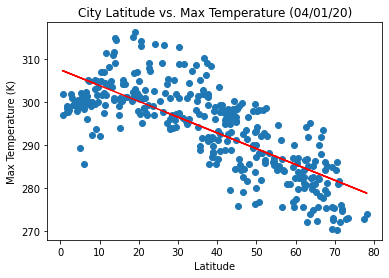

In [63]:
north_df = df_2[(df_2["Lat"]>=0)]
south_df = df_2[(df_2["Lat"]<0)]
north_temp_plot = plt.scatter(north_df["Lat"], north_df["Max Temp"])
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
m, b = np.polyfit(north_df["Lat"],north_df["Max Temp"], 1)
plt.plot(north_df["Lat"], m*north_df["Lat"]+b, color='red')
north_temp_plot
figure_6 = plt.savefig('../output_data/Figure6.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

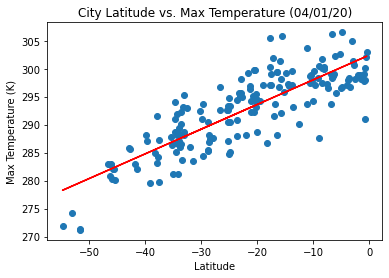

In [64]:
south_temp_plot = plt.scatter(south_df["Lat"], south_df["Max Temp"])
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
m, b = np.polyfit(south_df["Lat"],south_df["Max Temp"], 1)
plt.plot(south_df["Lat"], m*south_df["Lat"]+b, color='red')
south_temp_plot
figure_7 = plt.savefig('../output_data/Figure7.png')

The r-value is: 0.6082708688906918


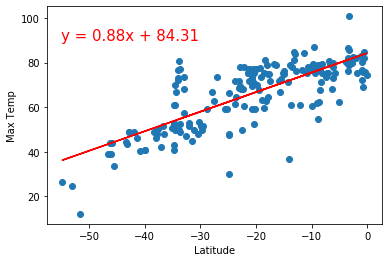

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

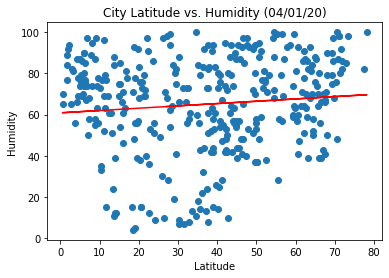

In [65]:
north_humidity_plot = plt.scatter(north_df["Lat"], north_df["Humidity"])
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
m, b = np.polyfit(north_df["Lat"],north_df["Humidity"], 1)
plt.plot(north_df["Lat"], m*north_df["Lat"]+b, color='red')
north_humidity_plot
figure_8 = plt.savefig('../output_data/Figure8.png')

The r-value is: 0.000543987878808455


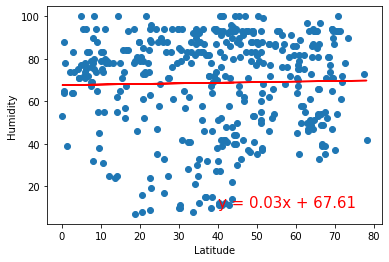

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

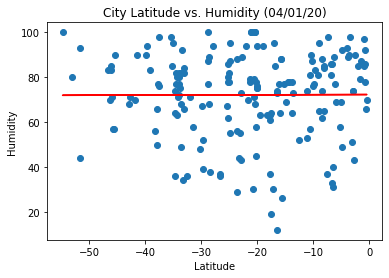

In [66]:
south_humidity_plot = plt.scatter(south_df["Lat"], south_df["Humidity"])
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
m, b = np.polyfit(south_df["Lat"],south_df["Humidity"], 1)
plt.plot(south_df["Lat"], m*south_df["Lat"]+b, color='red')
south_humidity_plot
figure_9 = plt.savefig('../output_data/Figure9.png')

The r-value is: 0.014985174297345524


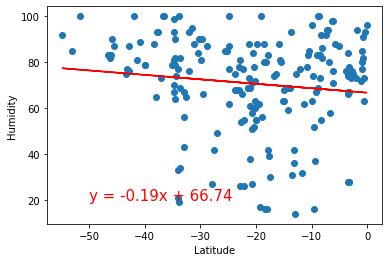

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

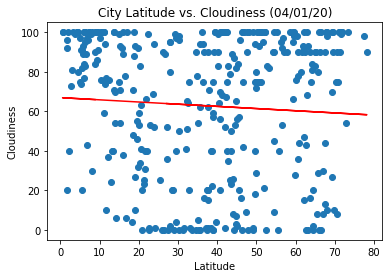

In [67]:
north_cloudiness_plot = plt.scatter(north_df["Lat"], north_df["Cloudiness"])
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
m, b = np.polyfit(north_df["Lat"],north_df["Cloudiness"], 1)
plt.plot(north_df["Lat"], m*north_df["Lat"]+b, color='red')
north_cloudiness_plot
figure_10 = plt.savefig('../output_data/Figure10.png')

The r-value is: 0.0020898727664228514


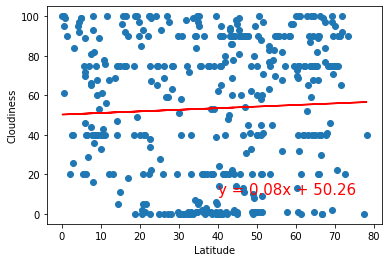

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

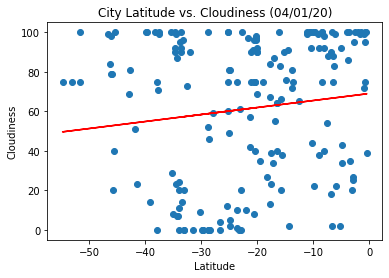

In [68]:
south_cloudiness_plot = plt.scatter(south_df["Lat"], south_df["Cloudiness"])
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
m, b = np.polyfit(south_df["Lat"],south_df["Cloudiness"], 1)
plt.plot(south_df["Lat"], m*south_df["Lat"]+b, color='red')
north_cloudiness_plot
figure_11 = plt.savefig('../output_data/Figure11.png')

The r-value is: 0.0035263772085582894


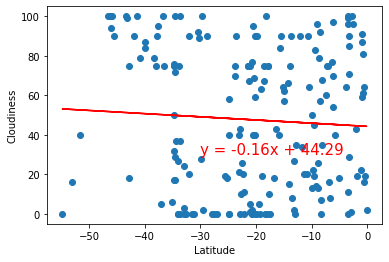

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

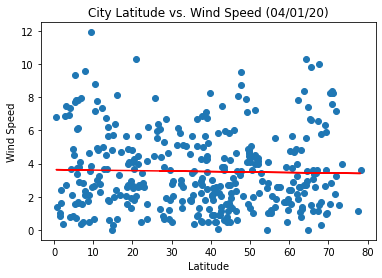

In [69]:
north_wind_plot = plt.scatter(north_df["Lat"], north_df["Wind Speed"])
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
m, b = np.polyfit(north_df["Lat"],north_df["Wind Speed"], 1)
plt.plot(north_df["Lat"], m*north_df["Lat"]+b, color='red')
north_wind_plot
figure_12 = plt.savefig('../output_data/Figure12.png')

The r-value is: 0.04019723576144484


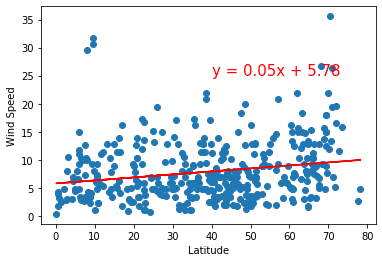

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

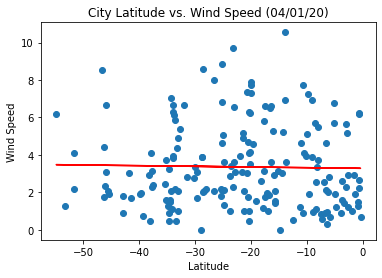

In [70]:
south_wind_plot = plt.scatter(south_df["Lat"], south_df["Wind Speed"])
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
m, b = np.polyfit(south_df["Lat"],south_df["Wind Speed"], 1)
plt.plot(south_df["Lat"], m*south_df["Lat"]+b, color='red')
south_wind_plot
figure_13 = plt.savefig('../output_data/Figure13.png')

The r-value is: 0.017128274759839232


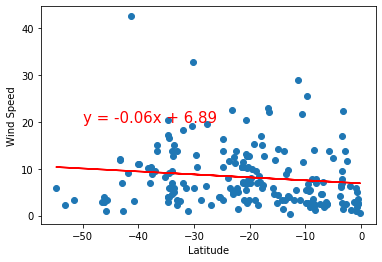